In [13]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../../output/actors_with_timestamp_birthdate.csv")

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     638 non-null    int64
 1   name           638 non-null    str  
 2   gender         638 non-null    str  
 3   wikipedia_url  638 non-null    str  
 4   birthdate      638 non-null    str  
 5   image_url      638 non-null    str  
 6   path           638 non-null    str  
 7   timestamp      562 non-null    str  
dtypes: int64(1), str(7)
memory usage: 40.0 KB


In [4]:
df["timestamp"].info()

<class 'pandas.Series'>
RangeIndex: 638 entries, 0 to 637
Series name: timestamp
Non-Null Count  Dtype
--------------  -----
562 non-null    str  
dtypes: str(1)
memory usage: 5.1 KB


In [5]:
df["timestamp"].value_counts()

timestamp
2025                   15
2014-11-23              7
\nUnknown date          7
2016-11-20              4
2021-12-10              4
                       ..
2014-10-14              1
2023-07-22 10:37:49     1
2024-08-19              1
2013-01-02 12:04:58     1
2023-03-19              1
Name: count, Length: 485, dtype: int64

In [6]:
df_no_na = df.dropna()
df_no_na[["name", "gender", "birthdate", "timestamp", "path"]]

,name,gender,birthdate,timestamp,path
0,AC Bonifacio,female,2002-12-13,"\nApril 11, 2025",250px-AC_Bonifacio_in_April_2025.jpg
2,Abel Estanislao,male,1995-05-19,2014-10-19,250px-Abel_Estanislao_-_Head_Shot.png
3,Aga Muhlach,male,1969-08-12,2025-03-24,250px-Aga_Muhlach_Uninvited_2024_film4.jpg
4,Ahron Villena,male,1987-03-10,2019-07-19,250px-Ahron_Villena_%282019%29.jpg
5,Ai-Ai delas Alas,female,1964-11-11,2020-01-14,250px-Ai_Ai_delas_Alas_2020_%28cropped%29.jpg
...,...,...,...,...,...
633,Ynna Asistio,female,1991-09-27,2014-10-14,250px-Dilim_Movie_in_the_Making_-_Ynna_Asistio...
634,Ysabel Ortega,female,1999-01-25,2023-07-22 10:37:49,250px-Ysabel_Ortega_at_SDCC_2023.jpg
635,Yul Servo,male,1977-02-22,2024-08-19,250px-Manila_Vice_Mayor_Yul_Servo.jpg
636,Zaijian Jaranilla,male,2001-08-23,2013-01-02 12:04:58,250px-Andre_Tiangco_with_Zaijan_Jaranilla_%281...


In [7]:
df_no_na["timestamp"].sort_values()

8                                    \n05-07-2019
284         \n17 July 2007 (original upload date)
435    \n22 September 2009 (original upload date)
189        \n23 April 2007 (original upload date)
534      \n28 January 2007 (original upload date)
                          ...                    
107                                    2025-09-28
564                                    2025-11-28
148                                    2025-12-04
495                                    2025-12-20
624                                    2025-12-22
Name: timestamp, Length: 562, dtype: str

In [8]:
df_no_na["timestamp"] = df_no_na["timestamp"].str.removeprefix("\n")
df_no_na["timestamp"] = df_no_na["timestamp"].str.removeprefix("published ")
df_no_na["timestamp"] = df_no_na["timestamp"].str.removesuffix(" (original upload date)")
def not_letters_only(input_string):
    return not bool(''.join(c for c in input_string if c.isalpha()))
df_no_na = df_no_na[df_no_na["timestamp"].apply(not_letters_only)]

In [9]:
def clean_timestamps(timestamp: str):
    return timestamp
df_no_na["timestamp"] = df_no_na["timestamp"].apply(clean_timestamps)
df_no_na.head()

,Unnamed: 0,name,gender,wikipedia_url,birthdate,image_url,path,timestamp
2,2,Abel Estanislao,male,https://en.wikipedia.org/wiki/Abel%20Estanislao,1995-05-19,https://upload.wikimedia.org/wikipedia/commons...,250px-Abel_Estanislao_-_Head_Shot.png,2014-10-19
3,3,Aga Muhlach,male,https://en.wikipedia.org/wiki/Aga%20Muhlach,1969-08-12,https://upload.wikimedia.org/wikipedia/commons...,250px-Aga_Muhlach_Uninvited_2024_film4.jpg,2025-03-24
4,4,Ahron Villena,male,https://en.wikipedia.org/wiki/Ahron%20Villena,1987-03-10,https://upload.wikimedia.org/wikipedia/commons...,250px-Ahron_Villena_%282019%29.jpg,2019-07-19
5,5,Ai-Ai delas Alas,female,https://en.wikipedia.org/wiki/Ai-Ai%20delas%20...,1964-11-11,https://upload.wikimedia.org/wikipedia/commons...,250px-Ai_Ai_delas_Alas_2020_%28cropped%29.jpg,2020-01-14
6,6,Ai-Ai delas Alas,female,https://en.wikipedia.org/wiki/Ai-Ai%20delas%20...,1964-11-11,https://upload.wikimedia.org/wikipedia/commons...,250px-Ai_Ai_Delas_Alas_100217.jpg,2017-10-02


In [10]:
df_no_na["birthdate"] = pd.to_datetime(df_no_na["birthdate"])
df_no_na["timestamp"] = pd.to_datetime(df_no_na["timestamp"], format="mixed")

In [11]:
df_no_na[["name", "gender", "birthdate", "timestamp", "path"]]

,name,gender,birthdate,timestamp,path
2,Abel Estanislao,male,1995-05-19,2014-10-19 00:00:00,250px-Abel_Estanislao_-_Head_Shot.png
3,Aga Muhlach,male,1969-08-12,2025-03-24 00:00:00,250px-Aga_Muhlach_Uninvited_2024_film4.jpg
4,Ahron Villena,male,1987-03-10,2019-07-19 00:00:00,250px-Ahron_Villena_%282019%29.jpg
5,Ai-Ai delas Alas,female,1964-11-11,2020-01-14 00:00:00,250px-Ai_Ai_delas_Alas_2020_%28cropped%29.jpg
6,Ai-Ai delas Alas,female,1964-11-11,2017-10-02 00:00:00,250px-Ai_Ai_Delas_Alas_100217.jpg
...,...,...,...,...,...
633,Ynna Asistio,female,1991-09-27,2014-10-14 00:00:00,250px-Dilim_Movie_in_the_Making_-_Ynna_Asistio...
634,Ysabel Ortega,female,1999-01-25,2023-07-22 10:37:49,250px-Ysabel_Ortega_at_SDCC_2023.jpg
635,Yul Servo,male,1977-02-22,2024-08-19 00:00:00,250px-Manila_Vice_Mayor_Yul_Servo.jpg
636,Zaijian Jaranilla,male,2001-08-23,2013-01-02 12:04:58,250px-Andre_Tiangco_with_Zaijan_Jaranilla_%281...


In [12]:
df_no_na["age"] = df_no_na["timestamp"] - df_no_na["birthdate"]
df_no_na["age_years"] = df_no_na["age"].dt.days / 365.25
df_no_na[["birthdate", "timestamp", "age_years"]]

,birthdate,timestamp,age_years
2,1995-05-19,2014-10-19 00:00:00,19.419576
3,1969-08-12,2025-03-24 00:00:00,55.613963
4,1987-03-10,2019-07-19 00:00:00,32.358658
5,1964-11-11,2020-01-14 00:00:00,55.173169
6,1964-11-11,2017-10-02 00:00:00,52.889802
...,...,...,...
633,1991-09-27,2014-10-14 00:00:00,23.047228
634,1999-01-25,2023-07-22 10:37:49,24.487337
635,1977-02-22,2024-08-19 00:00:00,47.488022
636,2001-08-23,2013-01-02 12:04:58,11.362081


<Axes: xlabel='age_years', ylabel='Count'>

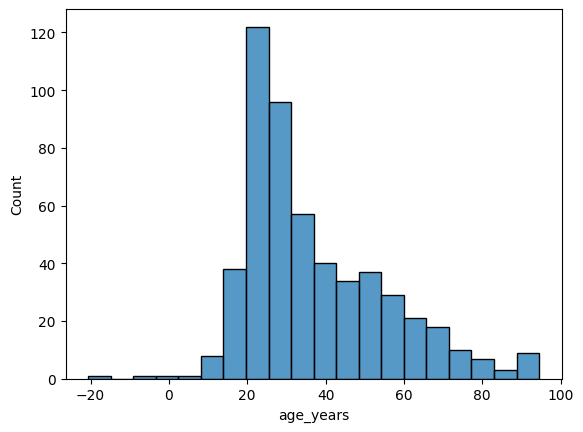

In [14]:
sns.histplot(df_no_na, x="age_years")

In [15]:
df_no_na

,Unnamed: 0,name,gender,wikipedia_url,birthdate,image_url,path,timestamp,age,age_years
2,2,Abel Estanislao,male,https://en.wikipedia.org/wiki/Abel%20Estanislao,1995-05-19,https://upload.wikimedia.org/wikipedia/commons...,250px-Abel_Estanislao_-_Head_Shot.png,2014-10-19 00:00:00,7093 days 00:00:00,19.419576
3,3,Aga Muhlach,male,https://en.wikipedia.org/wiki/Aga%20Muhlach,1969-08-12,https://upload.wikimedia.org/wikipedia/commons...,250px-Aga_Muhlach_Uninvited_2024_film4.jpg,2025-03-24 00:00:00,20313 days 00:00:00,55.613963
4,4,Ahron Villena,male,https://en.wikipedia.org/wiki/Ahron%20Villena,1987-03-10,https://upload.wikimedia.org/wikipedia/commons...,250px-Ahron_Villena_%282019%29.jpg,2019-07-19 00:00:00,11819 days 00:00:00,32.358658
5,5,Ai-Ai delas Alas,female,https://en.wikipedia.org/wiki/Ai-Ai%20delas%20...,1964-11-11,https://upload.wikimedia.org/wikipedia/commons...,250px-Ai_Ai_delas_Alas_2020_%28cropped%29.jpg,2020-01-14 00:00:00,20152 days 00:00:00,55.173169
6,6,Ai-Ai delas Alas,female,https://en.wikipedia.org/wiki/Ai-Ai%20delas%20...,1964-11-11,https://upload.wikimedia.org/wikipedia/commons...,250px-Ai_Ai_Delas_Alas_100217.jpg,2017-10-02 00:00:00,19318 days 00:00:00,52.889802
...,...,...,...,...,...,...,...,...,...,...
633,633,Ynna Asistio,female,https://en.wikipedia.org/wiki/Ynna%20Asistio,1991-09-27,https://upload.wikimedia.org/wikipedia/commons...,250px-Dilim_Movie_in_the_Making_-_Ynna_Asistio...,2014-10-14 00:00:00,8418 days 00:00:00,23.047228
634,634,Ysabel Ortega,female,https://en.wikipedia.org/wiki/Ysabel%20Ortega,1999-01-25,https://upload.wikimedia.org/wikipedia/commons...,250px-Ysabel_Ortega_at_SDCC_2023.jpg,2023-07-22 10:37:49,8944 days 10:37:49,24.487337
635,635,Yul Servo,male,https://en.wikipedia.org/wiki/Yul%20Servo,1977-02-22,https://upload.wikimedia.org/wikipedia/commons...,250px-Manila_Vice_Mayor_Yul_Servo.jpg,2024-08-19 00:00:00,17345 days 00:00:00,47.488022
636,636,Zaijian Jaranilla,male,https://en.wikipedia.org/wiki/Zaijian%20Jaranilla,2001-08-23,https://upload.wikimedia.org/wikipedia/commons...,250px-Andre_Tiangco_with_Zaijan_Jaranilla_%281...,2013-01-02 12:04:58,4150 days 12:04:58,11.362081
